In [5]:
#!pip install tensorflow

In [4]:
#!pip install tf-nightly

In [2]:
# importing required lib
import tensorflow as tf
import numpy as np

In [3]:
# Some required parameter to import dataset
width = 224
height = 224
#height and width are (224,224) since we will use the mobileNetv2 network
batch_size = 32
data_dir =r"C:\Users\SIVA\DataScientiest\E.OpenCV\Datasets"

In [5]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [6]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [7]:
classes = training.class_names  # we can see two classes with and without mask
classes

['with_mask', 'without_mask']

In [8]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

# Visualizing images from the data set

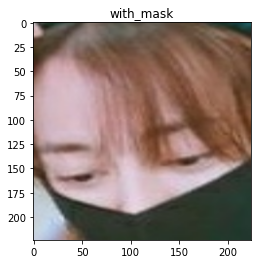

In [10]:
# Below result is random one

import matplotlib.pyplot as plt
for images, labels in training.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

## Loading the model to train and test/Validation

In [13]:
from tensorflow.keras.applications import MobileNetV2

In [14]:
model = MobileNetV2(weights='imagenet')

14548992/14536120 [==============================] - 3s 0us/step


In [15]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

## Training the model

In [17]:
face_mask_detection = model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3


C:\Users\SIVA\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


81/81 [==============================] - 966s 12s/step - loss: 0.2712 - accuracy: 0.9544 - val_loss: 29.8971 - val_accuracy: 0.4571
Epoch 2/3
81/81 [==============================] - 1027s 13s/step - loss: 0.0283 - accuracy: 0.9930 - val_loss: 14.4654 - val_accuracy: 0.6269
Epoch 3/3
81/81 [==============================] - 1111s 14s/step - loss: 0.0282 - accuracy: 0.9934 - val_loss: 0.6162 - val_accuracy: 0.9377
